In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [103]:
df=pd.read_csv('Car_Purchasing_Data.csv')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [104]:
df.shape

(500, 9)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [106]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [107]:
df=df.drop(['Customer Name','Customer e-mail','Country'],axis=1)
df.sample(10)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
299,1,46,82425.64679,7525.252104,684273.5913,63038.20422
340,1,39,41587.39238,5397.031602,322891.7787,23517.91983
332,0,31,41361.95045,10755.508420,615720.0425,25252.93221
42,0,38,50571.45969,13338.328520,348833.8403,28031.20985
222,0,47,61063.35631,12066.265710,509543.0859,46892.26617
295,1,40,57455.76090,12186.027930,159727.8753,28440.81268
363,1,32,60384.34541,11518.291750,589180.4485,35726.95299
147,0,61,38779.18396,12758.895830,581497.8874,47935.93940
268,0,54,55619.34152,11212.437910,229070.5491,41320.07256
151,1,50,52373.79446,11347.629670,633383.4925,47604.34591


In [108]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [109]:
df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


<Axes: >

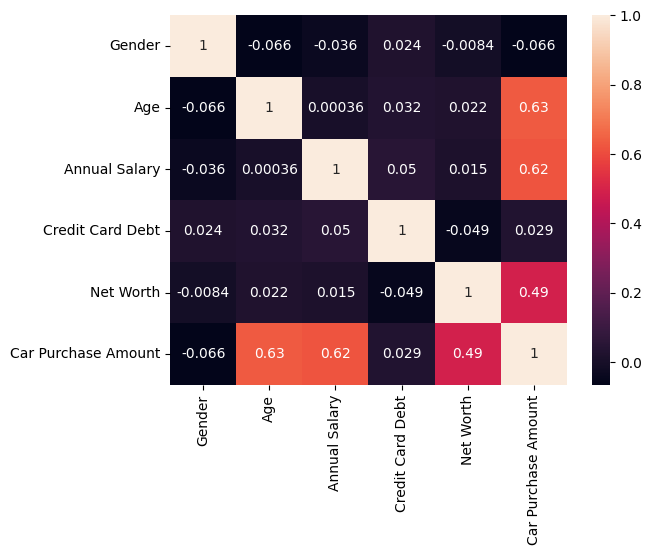

In [120]:
sns.heatmap(df.corr(),annot=True)

In [111]:
df.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [112]:
X=df.drop('Car Purchase Amount',axis=1)
y=df['Car Purchase Amount']

In [113]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [118]:
X_train

array([[-1.        , -1.24034892,  0.70264523,  0.06782569,  1.14322143],
       [ 1.        , -0.74371272, -0.49583563, -0.85967664, -1.16188481],
       [-1.        ,  1.61530926, -0.55624875,  1.05701072,  0.76354398],
       ...,
       [-1.        , -0.12291746,  0.13289634, -1.67932755,  1.00304384],
       [ 1.        ,  1.49115021, -1.73041723, -0.39436898, -0.06165717],
       [ 1.        , -1.98530323,  0.53060764, -0.63911954, -0.15781448]])

In [119]:
X_test

array([[-1.00000000e+00, -1.24034892e+00,  1.04631526e+00,
         1.97122847e-01,  6.79840675e-01],
       [ 1.00000000e+00,  2.49559693e-01, -2.39050062e-01,
        -1.42113712e+00,  2.37888758e-01],
       [ 1.00000000e+00,  1.36699116e+00,  4.85454331e-01,
         1.22302765e+00,  1.28338248e+00],
       [-1.00000000e+00,  4.97877796e-01, -5.55130418e-01,
        -1.28989642e+00, -2.35026575e+00],
       [-1.00000000e+00,  2.49559693e-01,  1.67721618e-01,
         2.94821592e-01,  2.61930932e+00],
       [-1.00000000e+00,  1.86362736e+00, -1.31427103e-02,
         4.66047428e-01,  1.30458861e+00],
       [-1.00000000e+00, -2.47076512e-01,  1.11430338e-01,
         1.88105940e+00,  1.80710947e+00],
       [-1.00000000e+00,  9.94514002e-01, -8.32158774e-02,
        -6.47308488e-01,  8.79576019e-01],
       [ 1.00000000e+00,  1.36699116e+00, -1.11575080e+00,
         3.72833629e-01,  1.31306083e+00],
       [ 1.00000000e+00,  3.73718745e-01,  3.25473842e-01,
        -1.62706409e+00

In [115]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred=regression.predict(X_test)
y_pred

array([45989.54733104, 45223.02897284, 63000.06820657, 31619.21756195,
       60029.675018  , 63067.28827186, 52220.212835  , 54535.57733288,
       52420.90039707, 48260.38225976, 37978.32493163, 56193.67796901,
       44675.75830359, 39293.07329137, 40164.30689656, 55256.87040149,
       48486.50654978, 17241.65343842, 60915.11744512, 50001.28696679,
       41608.01914155, 52656.1948089 , 51787.34478567, 38489.59183524,
       41136.08595326, 38686.9335169 , 64200.62366239, 47932.85642689,
       23079.52734895, 52490.04325973, 54914.43514146, 46102.27053619,
       41548.77959382, 57342.45195217, 42838.08358654, 39631.4307642 ,
       61921.49209854, 30743.33069277, 41865.0239423 , 39993.64026916,
       57251.53025061, 61043.20260202, 47079.22422414, 36371.67723767,
       53076.01116877, 44845.69580309, 35470.7411572 , 42165.6786678 ,
       52135.75018466, 47649.72193049, 41983.35444705, 32704.938157  ,
       38261.02705898, 41532.83502064, 44823.54206451, 47941.39326319,
      

In [117]:
print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
print('r2_score : ',r2_score(y_test,y_pred))


mean_absolute_error :  212.7210305155356
mean_squared_error :  62253.96588898687
r2_score :  0.9994234310992762
